<a href="https://colab.research.google.com/github/InsupCode/ML_Interpretability/blob/main/Covid_19__numerical_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("/content/df_cleaned_no2_mv_hosp.csv")

In [8]:
df.shape

(1025152, 14)

In [9]:
df.columns

Index(['SEX', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

### Feature Engineering for Logistic Regression model

### One hot encoding for categorical variables

In [10]:
# List of categorical columns
categorical_cols = ['SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

In [11]:
df_encoded = pd.get_dummies(df, columns=categorical_cols,prefix=[col + '_' for col in categorical_cols],dtype=int)

In [12]:
df_encoded.shape

(1025152, 26)

In [13]:
df_encoded.head()

AGE  CLASIFFICATION_FINAL  SEX__1  SEX__2  PNEUMONIA__1  PNEUMONIA__2  \
0   65                     1       1       0             1             0   
1   72                     0       0       1             1             0   
2   55                     1       0       1             0             1   
3   53                     0       1       0             0             1   
4   68                     1       0       1             0             1   

   DIABETES__1  DIABETES__2  COPD__1  COPD__2  ...  OTHER_DISEASE__1  \
0            0            1        0        1  ...                 0   
1            0            1        0        1  ...                 0   
2            1            0        0        1  ...                 0   
3            0            1        0        1  ...                 0   
4            1            0        0        1  ...                 0   

   OTHER_DISEASE__2  CARDIOVASCULAR__1  CARDIOVASCULAR__2  OBESITY__1  \
0                 1                  0                  1           0   
1                 1                  0                  1           1   
2                 1                  0                  1           0   
3                 1                  0                  1           0   
4                 1                  0                  1           0   

   OBESITY__2  RENAL_CHRONIC__1  RENAL_CHRONIC__2  TOBACCO__1  TOBACCO__2  
0           1                 0                 1           0           1  
1           0                 1                 0           0           1  
2           1                 0                 1           0           1  
3           1                 0                 1           0           1  
4           1                 0                 1           0           1  

[5 rows x 26 columns]

In [14]:
df_encoded.columns

Index(['AGE', 'CLASIFFICATION_FINAL', 'SEX__1', 'SEX__2', 'PNEUMONIA__1',
       'PNEUMONIA__2', 'DIABETES__1', 'DIABETES__2', 'COPD__1', 'COPD__2',
       'ASTHMA__1', 'ASTHMA__2', 'INMSUPR__1', 'INMSUPR__2', 'HIPERTENSION__1',
       'HIPERTENSION__2', 'OTHER_DISEASE__1', 'OTHER_DISEASE__2',
       'CARDIOVASCULAR__1', 'CARDIOVASCULAR__2', 'OBESITY__1', 'OBESITY__2',
       'RENAL_CHRONIC__1', 'RENAL_CHRONIC__2', 'TOBACCO__1', 'TOBACCO__2'],
      dtype='object')

### Normalizing numerical variables

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Normalize numerical variables
numerical_cols = ['AGE']
scaler = StandardScaler()

In [17]:
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [18]:
df_encoded.head()

AGE  CLASIFFICATION_FINAL  SEX__1  SEX__2  PNEUMONIA__1  PNEUMONIA__2  \
0  1.379972                     1       1       0             1             0   
1  1.797925                     0       0       1             1             0   
2  0.782898                     1       0       1             0             1   
3  0.663483                     0       1       0             0             1   
4  1.559095                     1       0       1             0             1   

   DIABETES__1  DIABETES__2  COPD__1  COPD__2  ...  OTHER_DISEASE__1  \
0            0            1        0        1  ...                 0   
1            0            1        0        1  ...                 0   
2            1            0        0        1  ...                 0   
3            0            1        0        1  ...                 0   
4            1            0        0        1  ...                 0   

   OTHER_DISEASE__2  CARDIOVASCULAR__1  CARDIOVASCULAR__2  OBESITY__1  \
0                 1                  0                  1           0   
1                 1                  0                  1           1   
2                 1                  0                  1           0   
3                 1                  0                  1           0   
4                 1                  0                  1           0   

   OBESITY__2  RENAL_CHRONIC__1  RENAL_CHRONIC__2  TOBACCO__1  TOBACCO__2  
0           1                 0                 1           0           1  
1           0                 1                 0           0           1  
2           1                 0                 1           0           1  
3           1                 0                 1           0           1  
4           1                 0                 1           0           1  

[5 rows x 26 columns]

## Logistic Regression

### Checking balance between class labels

In [19]:
df_encoded["CLASIFFICATION_FINAL"].value_counts()

CLASIFFICATION_FINAL
0    636274
1    388878
Name: count, dtype: int64

In [20]:
# Check class distribution
class_counts = df['CLASIFFICATION_FINAL'].value_counts()
print(class_counts)

# Calculate the imbalance ratio
class_ratio = class_counts[1] / class_counts[0]
print(f"Class ratio (minority/majority): {class_ratio:.2f}")

CLASIFFICATION_FINAL
0    636274
1    388878
Name: count, dtype: int64
Class ratio (minority/majority): 0.61


This implies that classes are mildly imbalanced

### Data Prep for Log-reg

In [21]:
X = df_encoded.drop(columns=['CLASIFFICATION_FINAL'])
y = df_encoded['CLASIFFICATION_FINAL']

In [22]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression model 1

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [24]:
# Training logistic regression
model_logistic = LogisticRegression(random_state=42, class_weight='balanced')
model_logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [25]:
# Predictions
y_pred = model_logistic.predict(X_test)

In [26]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Model Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_logistic.coef_[0]
})
print(coefficients)

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70    127162
           1       0.50      0.46      0.48     77869

    accuracy                           0.62    205031
   macro avg       0.59      0.59      0.59    205031
weighted avg       0.61      0.62      0.61    205031

Confusion Matrix:
[[90686 36476]
 [42096 35773]]
              Feature  Coefficient
0                 AGE     0.214889
1              SEX__1    -0.107590
2              SEX__2     0.068832
3        PNEUMONIA__1     0.439347
4        PNEUMONIA__2    -0.478105
5         DIABETES__1     0.062407
6         DIABETES__2    -0.101165
7             COPD__1    -0.184993
8             COPD__2     0.146235
9           ASTHMA__1    -0.081169
10          ASTHMA__2     0.042411
11         INMSUPR__1    -0.178251
12         INMSUPR__2     0.139494
13    HIPERTENSION__1     0.003983
14    HIPERTENSION__2    -0.042741
15   OTHER_DISEASE__1    -

It is also observed that when the classes are left unbalanced(i.e class weight=balanced not done), the accuracy increases but the F1 score does not..showing that the model is biased towards the majority class.

### Save the model

In [27]:
import pickle

In [28]:
#To save model:
# save the model as a pickle file
model_pkl_file = "Logistic_regression_Covid_numeric_preprocessed.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model_logistic, file)

## Explanation Algorithms

In [31]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5af51b491f6d0f0145e04b40e81f931808fa81ae6b573fd903e517a1e6a2b7e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### Lime for a positive instance--(when a person is a carrier of covid)- Correct prediction by model

In [61]:
X_test.head()

AGE  SEX__1  SEX__2  PNEUMONIA__1  PNEUMONIA__2  DIABETES__1  \
986952 -0.291837       1       0             0             1            0   
213358  1.320265       0       1             0             1            1   
135655 -0.411252       1       0             0             1            0   
610607  0.782898       0       1             0             1            0   
499321 -0.470960       0       1             0             1            0   

        DIABETES__2  COPD__1  COPD__2  ASTHMA__1  ...  OTHER_DISEASE__1  \
986952            1        0        1          0  ...                 0   
213358            0        0        1          0  ...                 0   
135655            1        0        1          0  ...                 0   
610607            1        0        1          0  ...                 0   
499321            1        0        1          0  ...                 0   

        OTHER_DISEASE__2  CARDIOVASCULAR__1  CARDIOVASCULAR__2  OBESITY__1  \
986952                 1                  0                  1           0   
213358                 1                  0                  1           0   
135655                 1                  0                  1           0   
610607                 1                  0                  1           0   
499321                 1                  0                  1           0   

        OBESITY__2  RENAL_CHRONIC__1  RENAL_CHRONIC__2  TOBACCO__1  TOBACCO__2  
986952           1                 0                 1           0           1  
213358           1                 1                 0           0           1  
135655           1                 0                 1           0           1  
610607           1                 0                 1           0           1  
499321           1                 0                 1           0           1  

[5 rows x 25 columns]

In [60]:
y_test.head()

986952    0
213358    0
135655    1
610607    1
499321    1
Name: CLASIFFICATION_FINAL, dtype: int64

In [68]:
print(y_test.loc[610607])

1


In [65]:
instance_index = 610607
specific_instance = X_test.loc[instance_index]
# checking model's prediction
# Get the model's prediction for the instance
predicted_class = model_logistic.predict([specific_instance])
predicted_probabilities = model_logistic.predict_proba([specific_instance])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
print(predicted_class)

[1]


Here, the model has correctly predicted the instance as 1, that is, the person is a carrier of covid

## Using Lime for explanation

In [33]:
import lime
import lime.lime_tabular
import numpy as np

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True,mode='classification')

In [69]:
exp = explainer.explain_instance(X_test.loc[610607],model_logistic.predict_proba)

exp.show_in_notebook(show_table=True)

Intercept 0.39390006591191606
Prediction_local [0.59172887]
Right: 0.5220133876291523


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

## Lime for a negative instance-- When a person is not a carrier of covid--Correct prediction by model

In [70]:
print(y_test.loc[986952])

0


In [71]:
instance_index = 986952
specific_instance = X_test.loc[instance_index]
# checking model's prediction
# Get the model's prediction for the instance
predicted_class = model_logistic.predict([specific_instance])
predicted_probabilities = model_logistic.predict_proba([specific_instance])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [72]:
predicted_class

array([0])

Here the model has correctly predicted the class as 0, that is, the person is not a carrier of covid

In [73]:
exp = explainer.explain_instance(X_test.loc[986952],model_logistic.predict_proba)

exp.show_in_notebook(show_table=True)

Intercept 0.43365003800248664
Prediction_local [0.46636229]
Right: 0.4208561080514606


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

### Incorrect prediciton by model

In [75]:
predicted_classes = model_logistic.predict(X_test)  # Make predictions on the scaled X_test

#Compare predictions with true labels
incorrect_predictions = (predicted_classes != y_test)  # True for incorrect predictions

#finding the indices of incorrect predictions
incorrect_indices = y_test[incorrect_predictions].index  # Indices of incorrect predictions

In [76]:
type(incorrect_indices)

pandas.core.indexes.base.Index

In [78]:
incorrect_indices[:5]

Index([213358, 135655, 499321, 342391, 379761], dtype='int64')

In [79]:
# Actual label of the index
print(y_test.loc[213358])

0


In [80]:
#Label predicted by model
instance_index = 213358
specific_instance = X_test.loc[instance_index]
# checking model's prediction
# Get the model's prediction for the instance
predicted_class = model_logistic.predict([specific_instance])
predicted_probabilities = model_logistic.predict_proba([specific_instance])
print(predicted_class)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The model has incorrectly predicted the class as 1 when the actual label is 0

### Lime explanation

In [81]:
exp = explainer.explain_instance(X_test.loc[213358],model_logistic.predict_proba)

exp.show_in_notebook(show_table=True)

Intercept 0.4157812795862386
Prediction_local [0.55703694]
Right: 0.5507131064785155


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

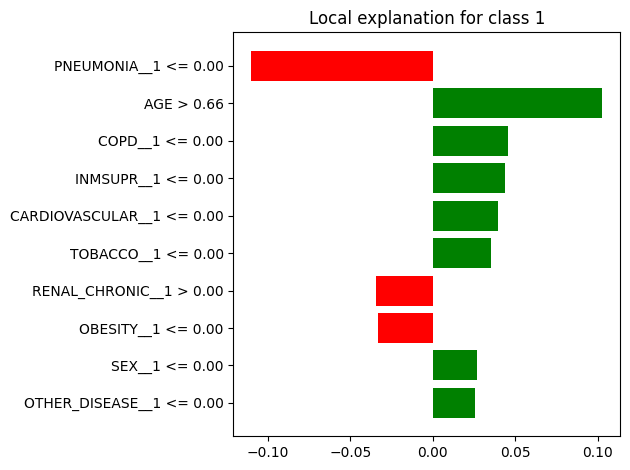

In [83]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

## Using SHAP for explanations

In [84]:
import shap

In [85]:
explainer = shap.Explainer(model_logistic, X_train)
shap_values = explainer(X_test)

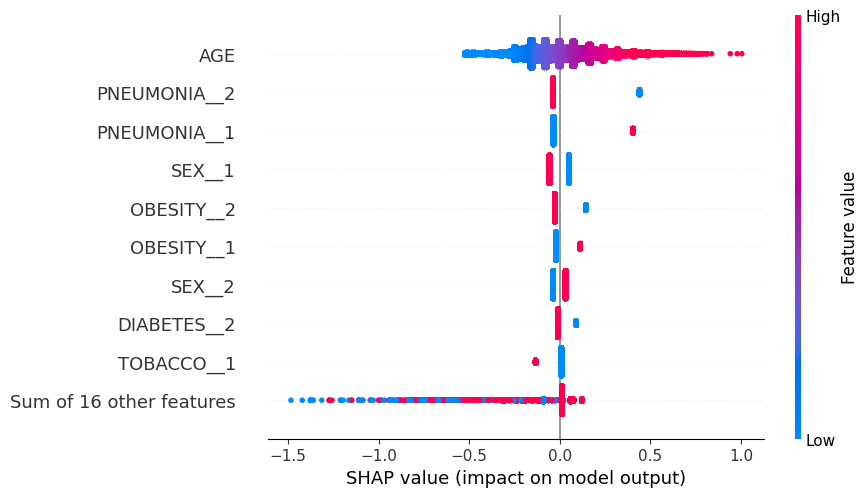

In [86]:
shap.initjs()
shap.plots.beeswarm(shap_values)

In [87]:
len(shap_values)

205031

In [88]:
len(y_test)

205031

In [93]:
y_test.loc[0]

1

In [95]:
#Label predicted by model
instance_index = 0
specific_instance = X_test.loc[instance_index]
# checking model's prediction
# Get the model's prediction for the instance
predicted_class = model_logistic.predict([specific_instance])
predicted_probabilities = model_logistic.predict_proba([specific_instance])
print(predicted_class)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
shap.initjs()
ind = 0
shap.plots.force(shap_values[ind])

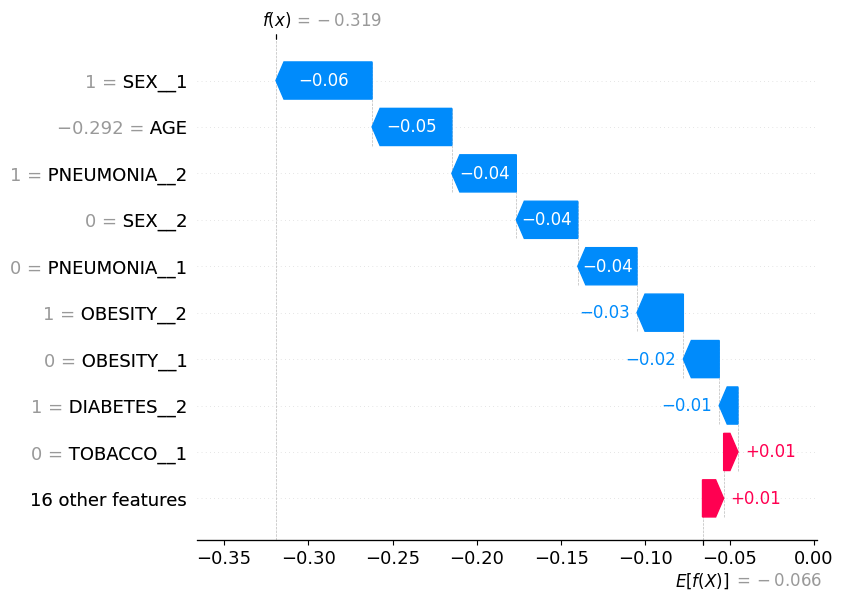

In [97]:
shap.plots.waterfall(shap_values[0])

## Summary plot of Shap Values for X_test

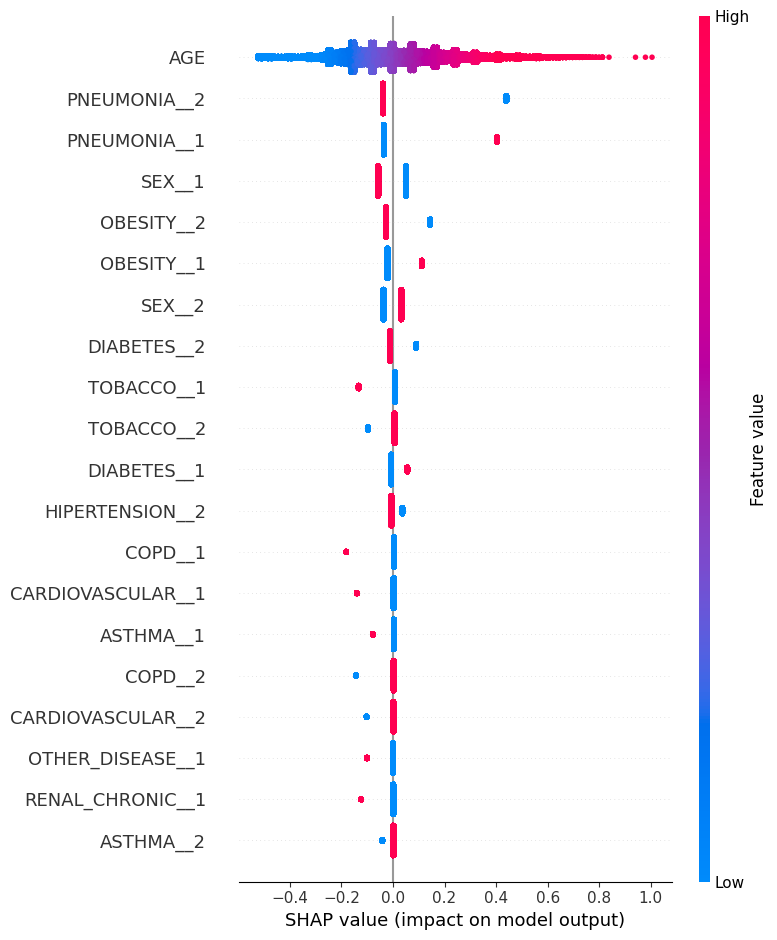

In [96]:
shap.initjs()

#A summary plot with the shapley value (feature importance)
shap.summary_plot(shap_values, X_test)

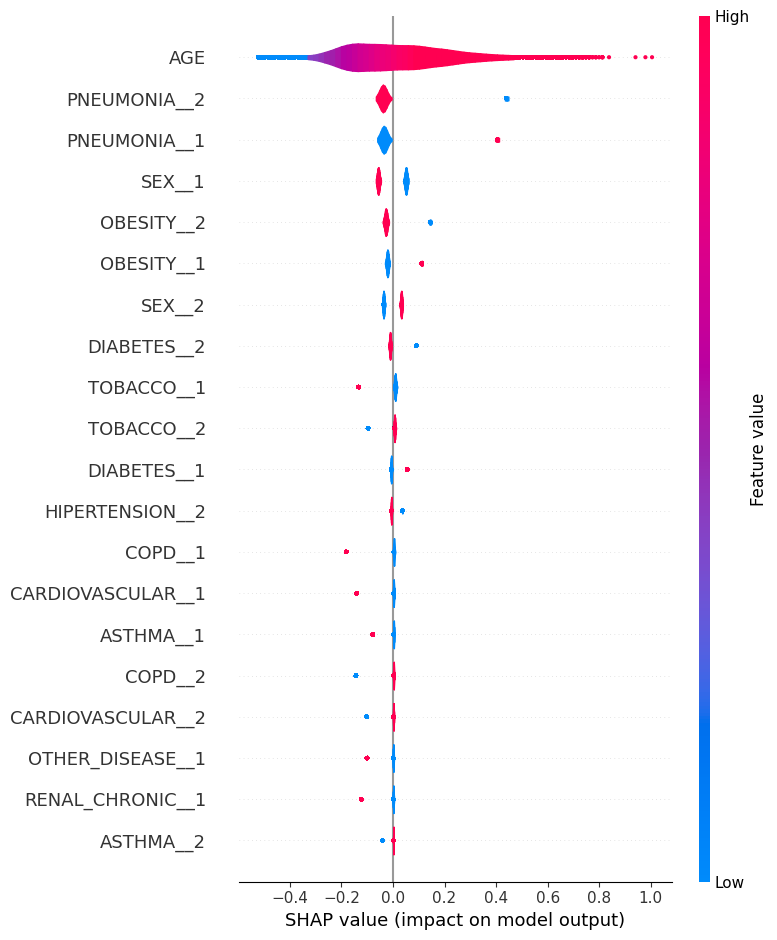

In [98]:
#Same as above, but with violin plots to better see the distribution of shapley values
shap.summary_plot(shap_values, X_test, plot_type="violin")

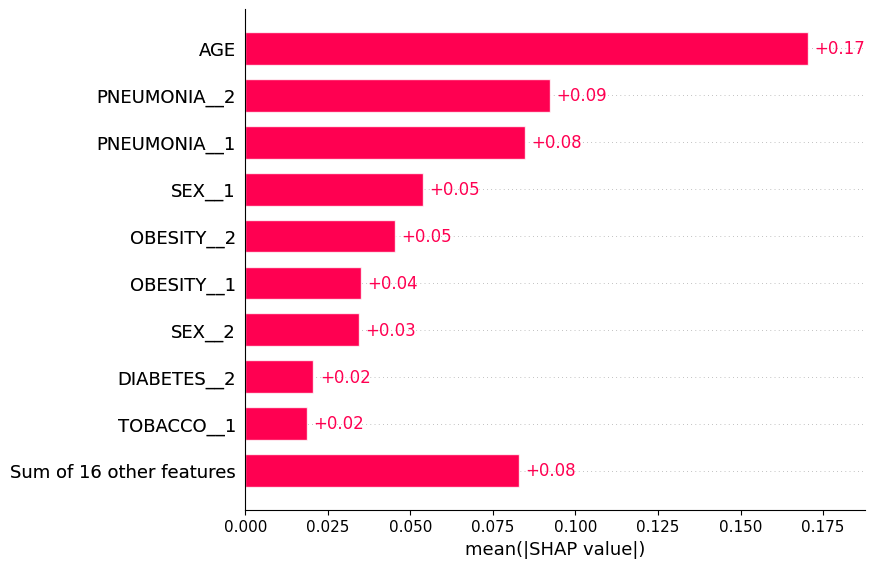

In [99]:
shap.plots.bar(shap_values)